# 21M.387 Fundamentals of Music Processing
## Lab1

## Jupyter Notebook

You are looking at a Jupyter notebook. It is an interactive document, backed by a server running the jupyter app. In this class, each of you will run your own server locally from the command line:

`$ jupyter notebook`

From there on, you interact through the web browser.

The notebook document itself is a file saved on your local computer. It has a `.ipynb` file extension. The notebook you are looking at now is called `lab1.ipynb`

Begin by going through the _User Interface Tour_ in the _Help_ Menu.

## Cells and Modes

Notebooks are divided into a bunch of _cells_. Each cell can be one of two types:
- __Markdown Cell__ used for nicely formatted text
- __Code Cell__ used for typing and executing python code, and seeing the results

Additionally, the notebook can be in one of two modes:
- __Edit Mode__ for editing text in a cell. 
- __Command Mode__ for notebook-wide operations like adding, deleting, moving cells, or changing the cell type.

In Edit Mode, the current cell has a <font color='green'>green border</font>. You enter Edit Mode by:
- double clicking on a cell
- hitting Enter in a cell

You can _execute_ a cell. This will render a Markdown Cell or run the code of a Code Cell. You execute a cell by:
- pressing _Shift-Enter_ (to execute and move to the next cell)
- pressing _Control-Enter_ (to execute and stay on the current cell)

Executing a cell automatically changes the mode to Command Mode. In Command Mode, the current cell has a <font color='blue'>blue border</font>. You enter Command Mode by:
- executing a cell (_Shift-Enter_ or _Control-Enter_)
- pressing ESC

Now is an excellent time to look at keyboard shortcuts by either:
- selecting _Help_ Menu -> _Keyboard Shortcuts_
- pressing _h_ when in Command Mode.

## Markdown

[This page](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) is a good markdown cheatsheet.

Markdown also uses [MathJax](http://meta.math.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) for fancy math formulas:

$\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}$


## Code

The next two cells are code cell. Execute the code there (with Control-Enter). Change the code and execute it again.

The code cell will automatically print the last value (which you can supress with a `;` at the end).  
You can also use `print`.

In [1]:
4 * 7

28

In [2]:
print(7 + 5)

a = 3
b = 'hello'
c = [5,6,7]

print(b, [a + i for i in c])

"do not " + "print " + "this";

12
hello [8, 9, 10]


## Setup / Import

You will usually find the next Code Cell (or something like it) at the top of a notebook. I use it to set up the python environment you'll need for the rest of the notebook.

The function `fmp.documentation_button()` creates a button you can click to open `fmplib` documentation in your browser.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp
from fmplib.pyqueue import connect_to_queue

fmp.documentation_button()

## Exercise 1

1. Find a song. There must must be a song somewhere on your computer.
- Open that song in [Audacity](http://www.audacityteam.org/download/).
- Find 10 seconds that you think are interesting.
- Change the _Project Rate (Hz)_ to 22050 (lower left corner).
- Export that bit of audio using _File_ -> _Export Selected Audio_.
- Choose the format _WAV (Microsoft) signed 16-bit PCM_.
- Save the audio file in the same directory as this `lab1.ipynb` file
- Load that audio and play it in the code cell below by using:  
`ipd.Audio('your file name.wav')`

In [34]:
ipd.Audio('clip.wav')

Now, load that same audio into python by calling:  
`x = fmp.load_wav('your file name.wav')`

Try using TAB completion. It works for both function and filenames.

`fmp.load_wav()` will only load 16-bit sample-width WAVE files also convert stereo to mono. Type:
`fmp.load_wav?` and execute the cell to see help about that function.

- Inspect the length of `x` with `len(x)`
- Play the vector `x` with `ipd.Audio(x, rate=22050)`
- Change the `rate` to some other number for fun.
- Calculate the precise length, in seconds, of this audio

In [35]:
x = fmp.load_wav('clip.wav')
print(x)
print('len(x)=%s' % len(x))

# original rate
fs = 22050
ipd.Audio(x, rate=fs)

# slowed remix ;)
ipd.Audio(x, rate=fs * 0.87)

[-0.11122131 -0.14457703 -0.1370697  ...  0.34960938  0.31257629
  0.31518555]
len(x)=220500


In [6]:
connect_to_queue('help')

## Exercise 2

Plot the audio that you just loaded. You use matplotlib's `pyplot`, which we imported into the namespace `plt`. There are about a billion plotting options in matplotlib. [Here](http://matplotlib.org/users/pyplot_tutorial.html) is a pyplot tutorial (for future reference).

The basic plot is easy:  
`plt.figure()` will set up a new figure (optional).  
`plt.plot(x)`  will plot to the most recent figure.
`plt.show()`   will show the plot (optional, happens automatically in jupyter notebook)

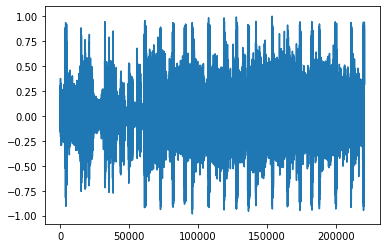

In [36]:
plt.plot(x)
plt.show()

Let's label the time axis better. For each point on the x-axis, we want to supply the correct time value.

- We have $x[n]$. We want to create $t[n]$ which provides the correct time value at index $n$.
- Create the vector `t`
- It should be the same length as `x`.
- Use the functions `np.arange()`. You can see some examples below. 
- In numpy, all mathematical operations work on arrays (vectors) as well as scalars.

Once you have created the correct vector `t`, you can plot:  
`plt.figure()`  
`plt.plot(t, x)`

[0 1 2 3 4 5 6 7 8 9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
n_secs=10.0
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 9.99986395e+00
 9.99990930e+00 9.99995465e+00]


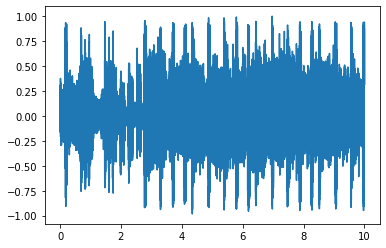

In [37]:
a = np.arange(10)
print(a)
a = a * .1
print(a)
a = a + 2
print(a)

# number of seconds in the sample is n_samples / sampling_rate
n_samples = len(x)
n_secs = n_samples / fs
print(f'n_secs={n_secs}')

t = np.arange(n_samples)
t = t / fs
print(t)

plt.plot(t, x)
plt.show()

In [9]:
connect_to_queue('help')

## Exercise 3

Now, we will modify the audio signal x by applying an amplitude or _gain_ factor.

- Create a new vector $g[n]$ that is a linear ramp going from 0.0 to 1.0.
- Plot `g`
- Then, do a vector point-by-point multiply in numpy: `x * g` to make a new vector `y`.
- Plot `y`
- Listen to it. What do you notice?


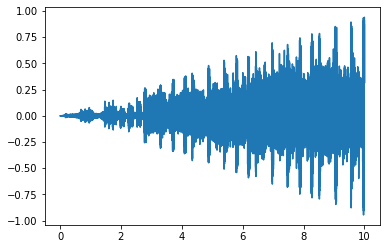

In [38]:
g = np.linspace(0.0, 1.0, n_samples)
y = x * g
#print(y)
plt.plot(t, y)
plt.show()

# amplitude increases linearly; loudness perception is not linear though
ipd.Audio(y, rate=fs)

In [11]:
connect_to_queue('help')

## Exercise 4

Now you will create and apply a gain curve where the _perceived loudness_ is linear.
Perceived loudness scales as the _log_ of amplitude, so we often describe volume in decibels (dB). The reference amplitude in this case is 1.0 (max volume). As we scale down the amplitude, the volume (in dB) goes negative.

Remember that the relationship between amplitude and the dB scale is:
$$ v_{dB} = 20 \cdot \log_{10}(a) $$

For example:

| dB    | Amp   |
|-------|-------|
| 0     | 1.0   |
| -6.02 | 0.5   |
| -40   |  0.01 |


- Make a new vector `v` that modifies the volume of `x` in a _linearly perceived_ way, starting at $v_{dB} = -40$ and ending (linearly) at $v_{dB} = 0$. 
- Plot `v`.
- Now convert `v` (which is in units of decibles) into `g` which is an amplitude (or gain value).
- Plot `g`.
- Now create `g * x`, plot and listen to the result.

Hints:
- Instead of using np.arange(), try using `np.linspace()`. See some usage examples below.
- Oh. Also, to do exponents in numpy, use `**`

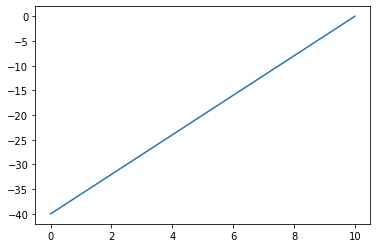

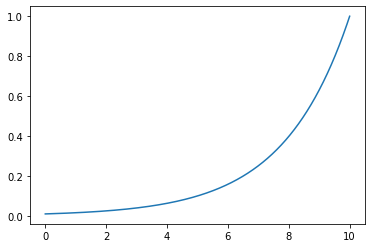

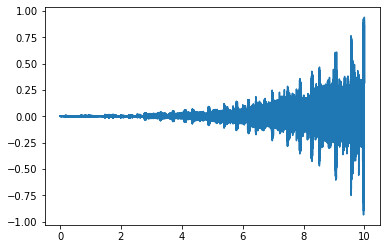

In [39]:
# examples:
#print(np.linspace(2, 4, 10))
#print(np.linspace(-5, 5, 20, endpoint=False))
#print(np.linspace(0,4,5) ** 2)

# my solution:
v = np.linspace(-40.0, 0.0, n_samples)
plt.plot(t, v)
plt.show()

# get amplitude from db:
amp_ref = 1.0
# db = 20 * log10(amp / amp_ref)
# db / 20 = log10(amp / amp_ref)
# # exp10 to get rid of log10:
# 10**(db/20) = amp / amp_ref
# amp = amp_ref * (10**(db/20))
amp = amp_ref * 10**(v/20)
g = amp
plt.plot(t, g)
plt.show()

y = g * x
plt.plot(t, y)
plt.show()

# amplitude increases logarithmically; loudness perception is linear
ipd.Audio(y, rate=fs)

In [13]:
connect_to_queue('help')

## Exercise 5

For this problem, it is useful to concatenate two vectors together. See below.

Make a volume ramp up to the half-way point and then ramp back down.
The volume curve should be (if song length is $L$):
- for $n=[0, {L\over2}) \rightarrow v=[-40db,0db)$
- for $n=[{L\over2},L) \rightarrow v=[0db,-40db)$

Plot and listen.

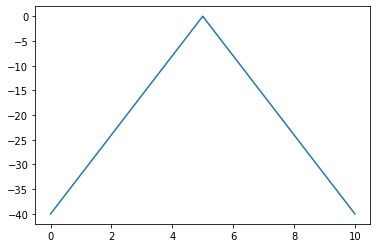

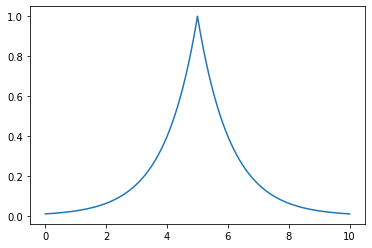

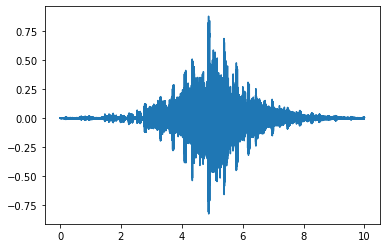

In [41]:
# examples:
# a = np.arange(4)
# b = np.ones(3)
# c = np.concatenate((a,b))
# print(a)
# print(b)
# print(c)

# my solution (after lab checkoff updated to handle odd number of samples):
import math
v1 = np.linspace(-40.0, 0.0, math.ceil(n_samples/2.0))
v2 = np.linspace(0.0, -40, math.floor(n_samples/2.0))
v = np.concatenate((v1, v2))
plt.plot(t, v)
plt.show()

# get amplitude from db (formula in cell above):
g = 10**(v/20)
plt.plot(t, g)
plt.show()

y = g * x
plt.plot(t, y)
plt.show()

# amplitude increases logarithmically; loudness perception is linear
ipd.Audio(y, rate=fs, normalize=False)

In [15]:
connect_to_queue('help')

## Exercise 6a

Instead of using $x(n)$ from a file, synthesize your own $x(n)$ to be a sine wave at a particular frequency in Hertz using the following function:

$$x[n] = A \sin(2 \pi f n / F_s) $$

where $A$ is the amplitude (or gain), $f$ is the desired frequency in Hertz, and $F_s$ is the sampling rate of your generated audio. 

Fill in the function below, with `dur` being the duration (in seconds) of the generated tone.  
Then listen to your generated audio with `Audio(x, rate=fs, norm=False)`.  
Use `norm=False` to disable audio normalization. Otherwise, all tones will be scaled to play at maximum volume.

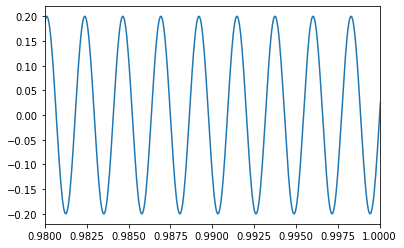

In [43]:
def make_sine_tone(amp, freq, dur, fs):
    # n_secs = n_samples / fs -> n_samples = fs * n_secs
    n_samples = fs * dur
    n = np.arange(0, n_samples)
    return amp * np.sin(2 * np.pi * freq * n / fs)

fs = 22050
dur = 5
freq = 440
amp = 0.2
y = make_sine_tone(amp, freq, dur, fs)

# plot over time
t = np.arange(len(y))
t = t / fs

plt.plot(t, y)
plt.xlim(.98,1)  # zoomed in
plt.show()

ipd.Audio(y, rate=fs, normalize=False)

## Exercise 6b

Once you have the basic sine wave, create a nicer sounding note by applying a decaying volume envelope (linear in decibels from $0db$ to $-40db$), as you did above.

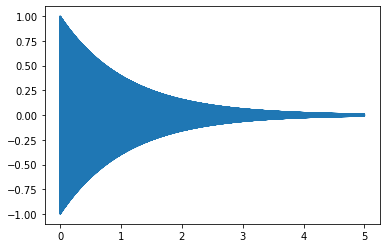

In [17]:
def make_decay_note(amp, freq, dur, fs):
    x = make_sine_tone(amp, freq, dur, fs)
    n_samples = len(x)
    
    # original amp is reference amp for linear envelope
    db = np.linspace(0.0, -40.0, n_samples)
    new_amp = amp * 10**(db/20)

    return new_amp * x


fs = 22050
dur = 5
freq = 440
amp = 1.0
y = make_decay_note(amp, freq, dur, fs)

# plot over time
t = np.arange(len(y))
t = t / fs

plt.plot(t, y)
plt.show()

ipd.Audio(y, rate=fs, normalize=False)

## Exercise 6c

Now create a simple note sequencer that can play a melody by stitching together a bunch of notes with particular frequencies and durations.

The melody is defined as an array of notes, where each note is `(frequency, duration)`.

An example melody is provided for you.

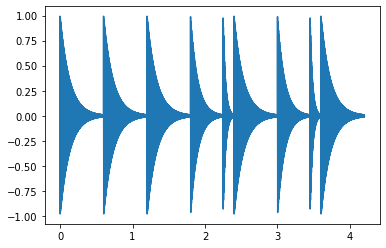

In [18]:
def make_melody(notes):
    amp = 1.0
    fs = 22050
    x = []
    for note in notes:
        x_note = make_decay_note(amp, note[0], note[1], fs)
        x = np.concatenate((x, x_note))
    return x

melody1 = [(261.6255653005985, 0.6), (261.6255653005985, 0.6), (261.6255653005985, 0.6), (207.65234878997245, 0.44999999999999996), (311.1269837220808, 0.15), (261.6255653005985, 0.6), (207.65234878997245, 0.44999999999999996), (311.1269837220808, 0.15), (261.6255653005985, 0.6)]

y = make_melody(melody1)
fs = 22050

# plot over time
t = np.arange(len(y))
t = t / fs

plt.plot(t, y)
plt.show()

# star wars imperial march ;D
ipd.Audio(y, rate=fs, normalize=False)

If you have time, you can further enhance your melody player in any way you want. For example:   

- let `make_melody` take in MIDI pitches instead of frequencies to specify the note pitch.
- add per-note volume control
- add the ability to play chords

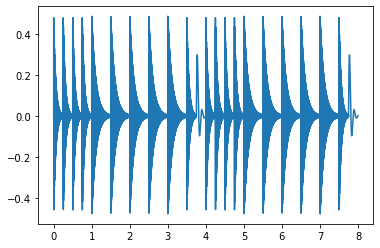

In [19]:
def make_chord(amp, freqs, dur, fs):
    n_samples = int(dur * fs)
    x = np.zeros(n_samples)
    
    for freq in freqs:
        x += make_decay_note(amp, freq, dur, fs)
    return x


def midi_to_freq(midi_pitch):
    assert(midi_pitch >= 0 and midi_pitch <= 127)
    # class notes, also useful: http://newt.phys.unsw.edu.au/jw/notes.html
    freq_A4 = 440
    midi_freq = 2**(((midi_pitch*1.0) - 69.0)/12.0) * freq_A4
    return midi_freq


# each note is a tuple of the form:
# (midi_pitch, dur_secs, amp)
def make_melody_midi(midi_notes):
    x = []
    for note in midi_notes:
        fs = 22050
        freq = midi_to_freq(note[0])
        x_note = make_decay_note(note[2], freq, note[1], fs)
        x = np.concatenate((x, x_note))
    return x

# usage
a = 0.7
dur = 0.25
melody = [
    (55, dur, a),    # G3
    (54, dur, a),    # F#3
    (55, dur, a),    # G3
    (55, dur, a),    # G3
    (57, dur*2, a),  # A3
    (55, dur*2, a),  # G3
    (54, dur*2, a),  # F#3
    (55, dur*2, a),  # G3
    (59, dur*2, a),  # B3
    (55, dur, a),    # G3
    (0, dur, a)      # pause
]

y = make_melody_midi(melody + melody)
fs = 22050

# plot over time
t = np.arange(len(y))
t = t / fs

plt.plot(t, y)
plt.show()

# arooound the woooorld, a-round the wo-orld
ipd.Audio(y, rate=fs, normalize=False)

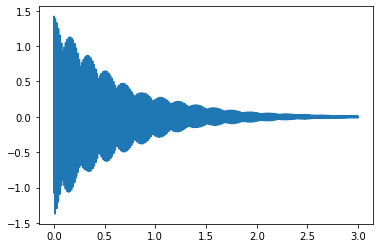

In [20]:
# C major triad
freqs = [midi_to_freq(x) for x in [60, 64, 67]]
y = make_chord(0.7, freqs, 3, fs)
t = np.arange(len(y))
t = t / fs
plt.plot(t, y)
plt.show()
ipd.Audio(y, rate=fs)

In [21]:
connect_to_queue('help')

In [22]:
connect_to_queue('checkoff')